## HOUSE PRICE PREDICTION PROBLEM: Advanced Linear Regression

##### Importing Libraries:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import missingno as msno

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset:

In [42]:
price_data = pd.read_csv('train.csv')
price_data.shape

(1460, 81)

We have a total of 1460 records with 81 columns. Let's examine the columns now.

In [43]:
price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
price_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see that there are some columns like 'Alley' that has a lot of null values. Also, it seems there might be some problem with the datatype of some columns.

Let's examine the data to better understand it.

**Data Understanding**

In [45]:
price_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We have a total of 81 columns. Out of those 38 have numerical values in it. Let's try to find the most important and meaningful columns from these.

The above table shows that apart from missing values we also have a lot of outliers in some columns.

## Data Cleaning

- Check the rate of missing values in each column:

In [46]:
missing_data_columns = 100*(price_data.loc[:,price_data.isnull().sum() > 0].isnull().sum().sort_values(ascending = False))/len(price_data)
missing_data_columns

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

A total of 19 columns have varying percentage of missing records. Let's see the percentage and drop accordingly.

A total of 5 columns (out of 19 as seen above) have Nulls more than 40% of the records. Let's drop them.

In [47]:
# drop the columns and update the series by removing entries having 100% missing values
price_data.drop(missing_data_columns[:5].index, axis = 1, inplace = True)
missing_data_columns = missing_data_columns[5:]
price_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


<AxesSubplot:>

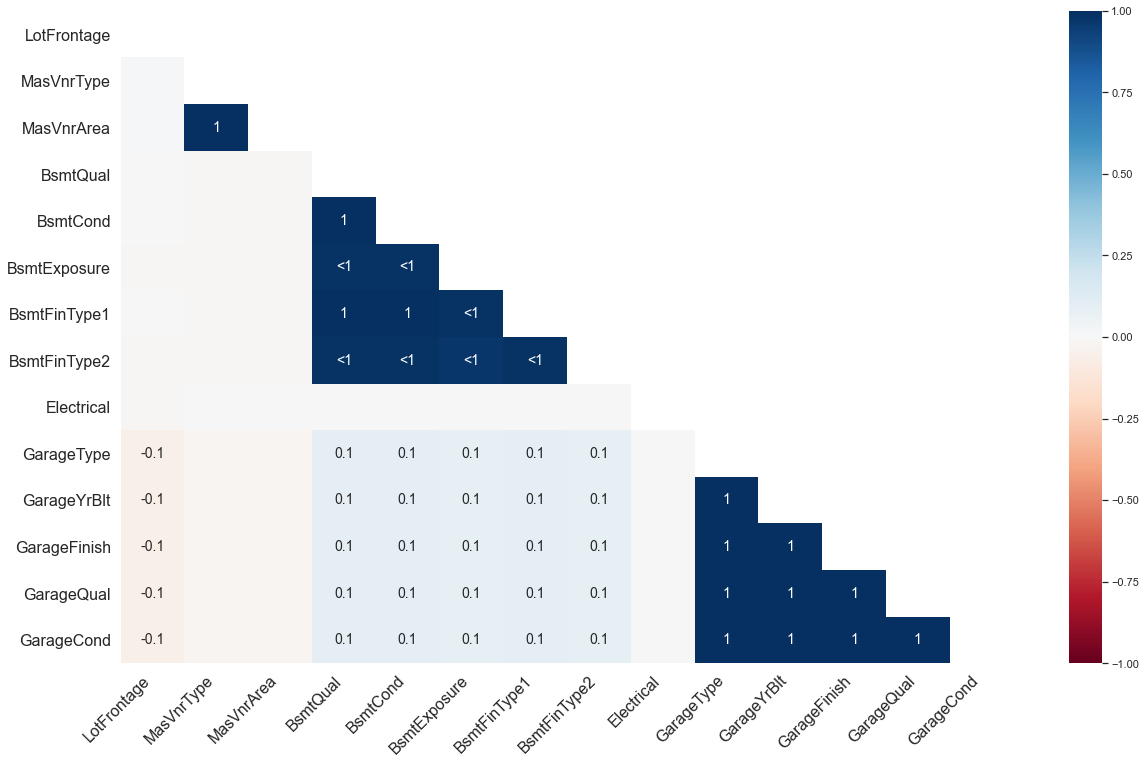

In [49]:
# visualise correlation between the number of missing values in columns
msno.heatmap(price_data)

From the above heatmap, it's clear that if 'GarageCond' is empty then 'GarageQual','GarageType','GarageYrBlt' and 'GarageFinish' are also empty. 

Empty columns are removed from the dataset. Now re-check the rate of missing values in remaining columns 

In [50]:
missing_data_columns

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

- Check the number of missing values in each row.

In [51]:
price_data.isnull().sum(axis = 1).sort_values(ascending = False)

1179    10
705     10
1011    10
520     10
1218    10
        ..
554      0
552      0
551      0
550      0
1459     0
Length: 1460, dtype: int64

There aren't any rows having high rate of missing data. So let's try to handle the missing data in remaining columns and then recheck missing values in rows.

In [52]:
# recheck the rate of missing data in dataset
print(price_data.shape)
price_data.isnull().sum().sort_values(ascending = False)

(1460, 76)


LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 76, dtype: int64

- Checking how we can impute the remaining columns with missing values

All these nulls have a business meaning. Therefore we are replacing the nulls with No_XXX so that a new and relevant category is created, This will help the model in better understand the underlying pattern of the dataset.

1. GarageType

In [53]:
price_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [54]:
price_data['GarageType'] = price_data['GarageType'].fillna('No_Garage')
price_data['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

2. GarageCond

In [55]:
price_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [56]:
price_data['GarageCond'] = price_data['GarageCond'].fillna('No_Garage')
price_data['GarageCond'].value_counts()

TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

3. GarageCond

In [57]:
price_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [58]:
price_data['GarageFinish'] = price_data['GarageFinish'].fillna('No_Garage')
price_data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

In [59]:
#Rechecking the null counts again
price_data.isnull().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 76, dtype: int64

4. GarageQual

In [60]:
price_data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [61]:
price_data['GarageQual'] = price_data['GarageQual'].fillna('No_Garage')
price_data['GarageQual'].value_counts()

TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

5. BsmtFinType2

In [62]:
price_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [63]:
price_data['BsmtFinType2'] = price_data['BsmtFinType2'].fillna('No_Basement')
price_data['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

6. BsmtExposure

In [64]:
price_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [65]:
price_data['BsmtExposure'] = price_data['BsmtExposure'].fillna('No_Basement')
price_data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

In [66]:
#Rechecking the null counts again
price_data.isnull().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 76, dtype: int64

7. BsmtCond

In [67]:
price_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [68]:
price_data['BsmtCond'] = price_data['BsmtCond'].fillna('No_Basement')
price_data['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

8. BsmtQual

In [69]:
print(price_data['BsmtQual'].value_counts())
price_data['BsmtQual'] = price_data['BsmtQual'].fillna('No_Basement')
price_data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

9. BsmtFinType1

In [70]:
print(price_data['BsmtFinType1'].value_counts())
price_data['BsmtFinType1'] = price_data['BsmtFinType1'].fillna('No_Basement')
price_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [71]:
#Rechecking the null counts again
price_data.isnull().sum().sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
              ... 
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
SalePrice        0
Length: 76, dtype: int64

10. GarageYrBlt

In [463]:
price_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Checking the columns:

In [464]:
price_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

The 'GarageYrBlt' is mostly useful to understand the condition and quality of the garage in present times. Since we can get this information from the columns like 'GarageCond' and 'GarageQual' we can drop the 'GarageYrBlt' column entirely.

In [72]:
# dropping columns which are not relevant for the analysis
price_data.drop(['GarageYrBlt'],axis = 1, inplace = True)

In [73]:
#Rechecking the null counts again
price_data.isnull().sum().sort_values(ascending = False)

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
Id               0
              ... 
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 75, dtype: int64

11. MSSubClass

The 'MSSubClass' is a categorical column according to data dictionary. But we can see that it has numerical values in the dataframe. Since the categories donot have any inherent ranking in them, therefore keeping these numerical values as is may bias the model.


Therefore, we are mapping these numerical columns to its appropiate categories here.

In [77]:
price_data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [78]:
def map_MSSubClass(x):
    return x.map({20:'1-STORY_1946_NEWER', 30:'1-STORY_1945_OLDER', 40:'1-STORY_W/FINISHED_ATTIC', 45:'1-1/2_STORY_UNFINISHED',
                  50:'1-1/2_STORY_FINISHED', 60:'2-STORY_1946_NEWER', 70:'2-STORY_1945_OLDER', 75:'2-1/2_STORY', 
                  80:'SPLIT_OR_MULTI-LEVEL', 85:'SPLIT_FOYER', 90:'DUPLEX', 120:'1-STORY_PUD',
                150:'1-1/2 STORY_PUD',160:'2-STORY_PUD',180:'PUD_MULTILEVEL', 190:'2 FAMILY CONVERSION'})

price_data[['MSSubClass']] = price_data[['MSSubClass']].apply(map_MSSubClass)

In [79]:
price_data['MSSubClass'].value_counts()

1-STORY_1946_NEWER          536
2-STORY_1946_NEWER          299
1-1/2_STORY_FINISHED        144
1-STORY_PUD                  87
1-STORY_1945_OLDER           69
2-STORY_PUD                  63
2-STORY_1945_OLDER           60
SPLIT_OR_MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT_FOYER                  20
2-1/2_STORY                  16
1-1/2_STORY_UNFINISHED       12
PUD_MULTILEVEL               10
1-STORY_W/FINISHED_ATTIC      4
Name: MSSubClass, dtype: int64

12. OverallQual

In [80]:
price_data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

'OverallQual' is a categorical column according to data dictionary. The categories are present in an ordered rank. Same as these numerical values. Therefore we are keeping these numerical values as is since these are correct representative of the categories.

13. OverallCond

In [81]:
price_data['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

'OverallCond' is a categorical column according to data dictionary. The categories are present in an ordered rank. Same as these numerical values. Therefore we are keeping these numerical values as is since these are correct representative of the categories.

14. YearBuilt

In [82]:
print(price_data['YearBuilt'].nunique())
price_data['YearBuilt'].describe()

112


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Since there are 112 unique values, converting to categorical will increase the total column count tremendously. So keeping it as is.

15. YearRemodAdd

In [473]:
print(price_data['YearRemodAdd'].nunique())
price_data['YearRemodAdd'].describe()

61


count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

Since there are 61 unique values, converting to categorical will increase the total column count tremendously. So keeping it as is.

16. MoSold

Lets convert to a categorical column with appropiate month names

In [83]:
price_data['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [84]:
def map_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

price_data[['MoSold']] = price_data[['MoSold']].apply(map_mnth)

In [85]:
price_data['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

17. YrSold

Lets convert to a categorical column as we have only 5 unique values here

In [86]:
price_data['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [87]:
price_data['YrSold'] = price_data['YrSold'].astype("object")

Lets check the datatypes once again.

In [88]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

18. Electrical

In [89]:
price_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [90]:
price_data['Electrical'] = price_data['Electrical'].fillna('No_Electrical')
price_data['Electrical'].value_counts()

SBrkr            1334
FuseA              94
FuseF              27
FuseP               3
Mix                 1
No_Electrical       1
Name: Electrical, dtype: int64

19. MasVnrType

In [91]:
price_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [92]:
price_data['MasVnrType'] = price_data['MasVnrType'].fillna('No_Masonry')
price_data['MasVnrType'].value_counts()

None          864
BrkFace       445
Stone         128
BrkCmn         15
No_Masonry      8
Name: MasVnrType, dtype: int64

In [93]:
#Recheck the null counts
price_data.isnull().sum().sort_values(ascending = False)

LotFrontage    259
MasVnrArea       8
Id               0
FullBath         0
Functional       0
              ... 
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
SalePrice        0
Length: 75, dtype: int64

In [94]:
price_data.isnull().sum().sum()

267

Since the 'LotFrontage' and 'MasVnrArea' are numerical columns so we have to impute it with statistical techniques. Hence we will take care of these two column after we have done train-test split so that we can use the mean/median as learnt from the train set to impute the test null values.

In [95]:
#Dropping the 'Id' column as it is redundant:
price_data.drop(['Id'],axis = 1, inplace = True)

- Checking Outliers:

Below categorical columns have large number of outliers in them. We are not imputing it now. Instead we keep it as is because the MinMaxScaler (that we will use later) will anyway scale these outliers to appropiate values.

20. EnclosedPorch

In [97]:
price_data['EnclosedPorch'].describe()

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

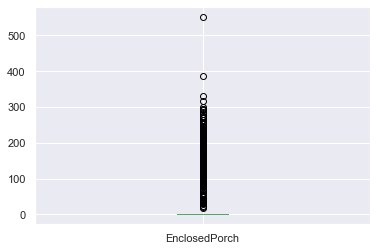

In [98]:
price_data['EnclosedPorch'].plot.box()
plt.show()

21. 3SsnPorch

In [99]:
price_data['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

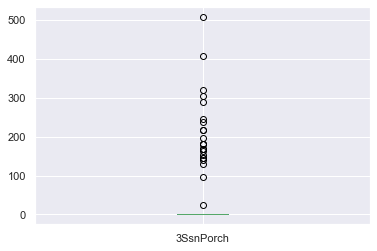

In [100]:
price_data['3SsnPorch'].plot.box()
plt.show()

22. ScreenPorch

In [101]:
price_data['ScreenPorch'].describe()

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

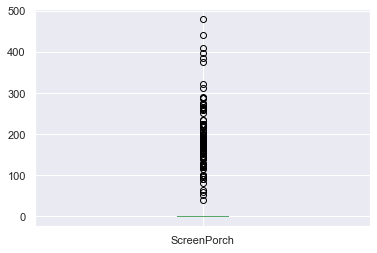

In [102]:
price_data['ScreenPorch'].plot.box()
plt.show()

23. PoolArea

In [103]:
price_data['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

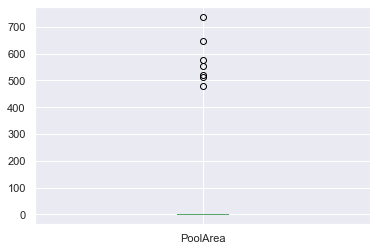

In [104]:
price_data['PoolArea'].plot.box()
plt.show()

24. MiscVal

In [105]:
price_data['MiscVal'].describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

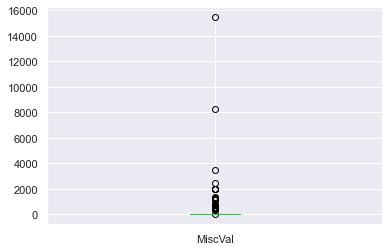

In [106]:
price_data['MiscVal'].plot.box()
plt.show()

25. SaleType

In [368]:
price_data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

26. BsmtFinSF2

In [107]:
price_data['BsmtFinSF2'].describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

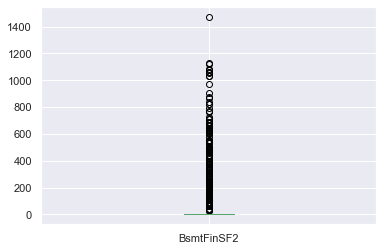

In [108]:
price_data['BsmtFinSF2'].plot.box()
plt.show()

27. BsmtFinSF1

In [109]:
price_data['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

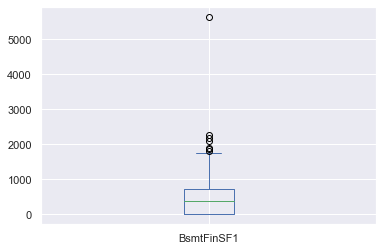

In [110]:
price_data['BsmtFinSF1'].plot.box()
plt.show()

28. BsmtUnfSF

In [111]:
price_data['BsmtUnfSF'].describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

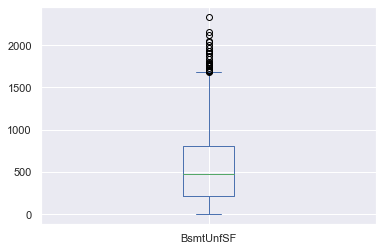

In [112]:
price_data['BsmtUnfSF'].plot.box()
plt.show()

29. LowQualFinSF

In [113]:
price_data['LowQualFinSF'].describe()

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

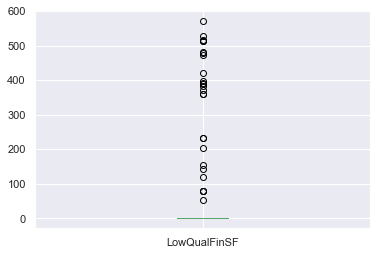

In [114]:
price_data['LowQualFinSF'].plot.box()
plt.show()

30. GrLivArea

In [115]:
price_data['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

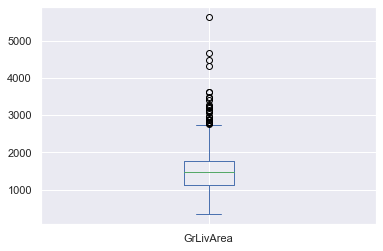

In [116]:
price_data['GrLivArea'].plot.box()
plt.show()

31. BsmtFullBath

In [117]:
price_data['BsmtFullBath'].describe()

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

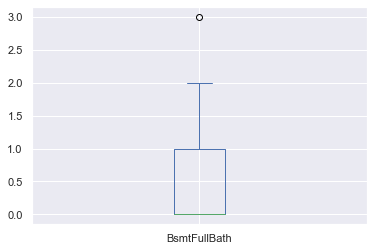

In [118]:
price_data['BsmtFullBath'].plot.box()
plt.show()

32. BsmtHalfBath

In [119]:
price_data['BsmtHalfBath'].describe()

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

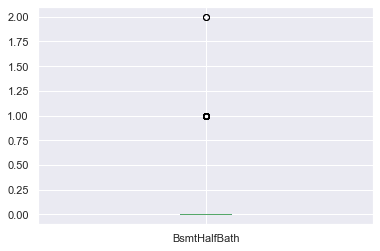

In [120]:
price_data['BsmtHalfBath'].plot.box()
plt.show()

33. BedroomAbvGr

In [121]:
price_data['BedroomAbvGr'].describe()

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

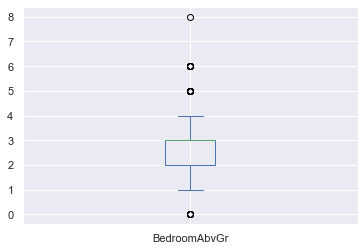

In [122]:
price_data['BedroomAbvGr'].plot.box()
plt.show()

34. HalfBath

In [123]:
price_data['HalfBath'].describe()

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

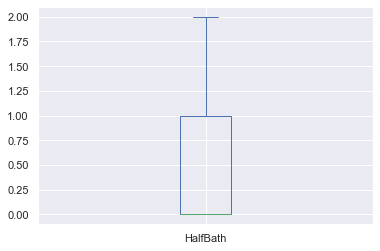

In [124]:
price_data['HalfBath'].plot.box()
plt.show()

35. FullBath

In [125]:
price_data['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

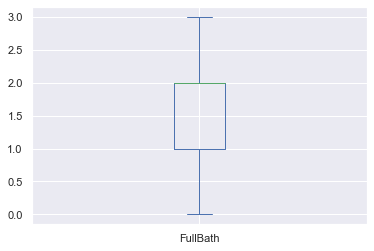

In [126]:
price_data['FullBath'].plot.box()
plt.show()

36. WoodDeckSF

In [127]:
price_data['WoodDeckSF'].describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

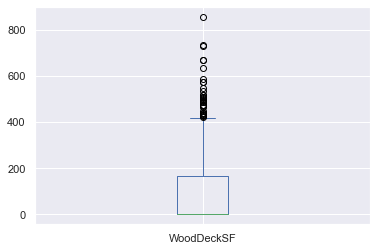

In [128]:
price_data['WoodDeckSF'].plot.box()
plt.show()

37. OpenPorchSF

In [129]:
price_data['OpenPorchSF'].describe()

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

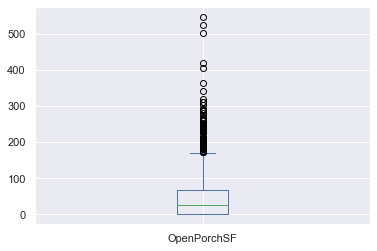

In [130]:
price_data['OpenPorchSF'].plot.box()
plt.show()

In [131]:
price_data.shape

(1460, 74)

- Handling Missing Value: Conclusion:

We donot have any more nulls that is missing values in the entire dataset has been handled now. We have dropped all the columns having NULL records above 40%.

In [132]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Data Analysis

In [134]:
numerical_columns = price_data.select_dtypes(include=['int64','float64']).columns
categorical_columns = price_data.select_dtypes(include=['object']).columns

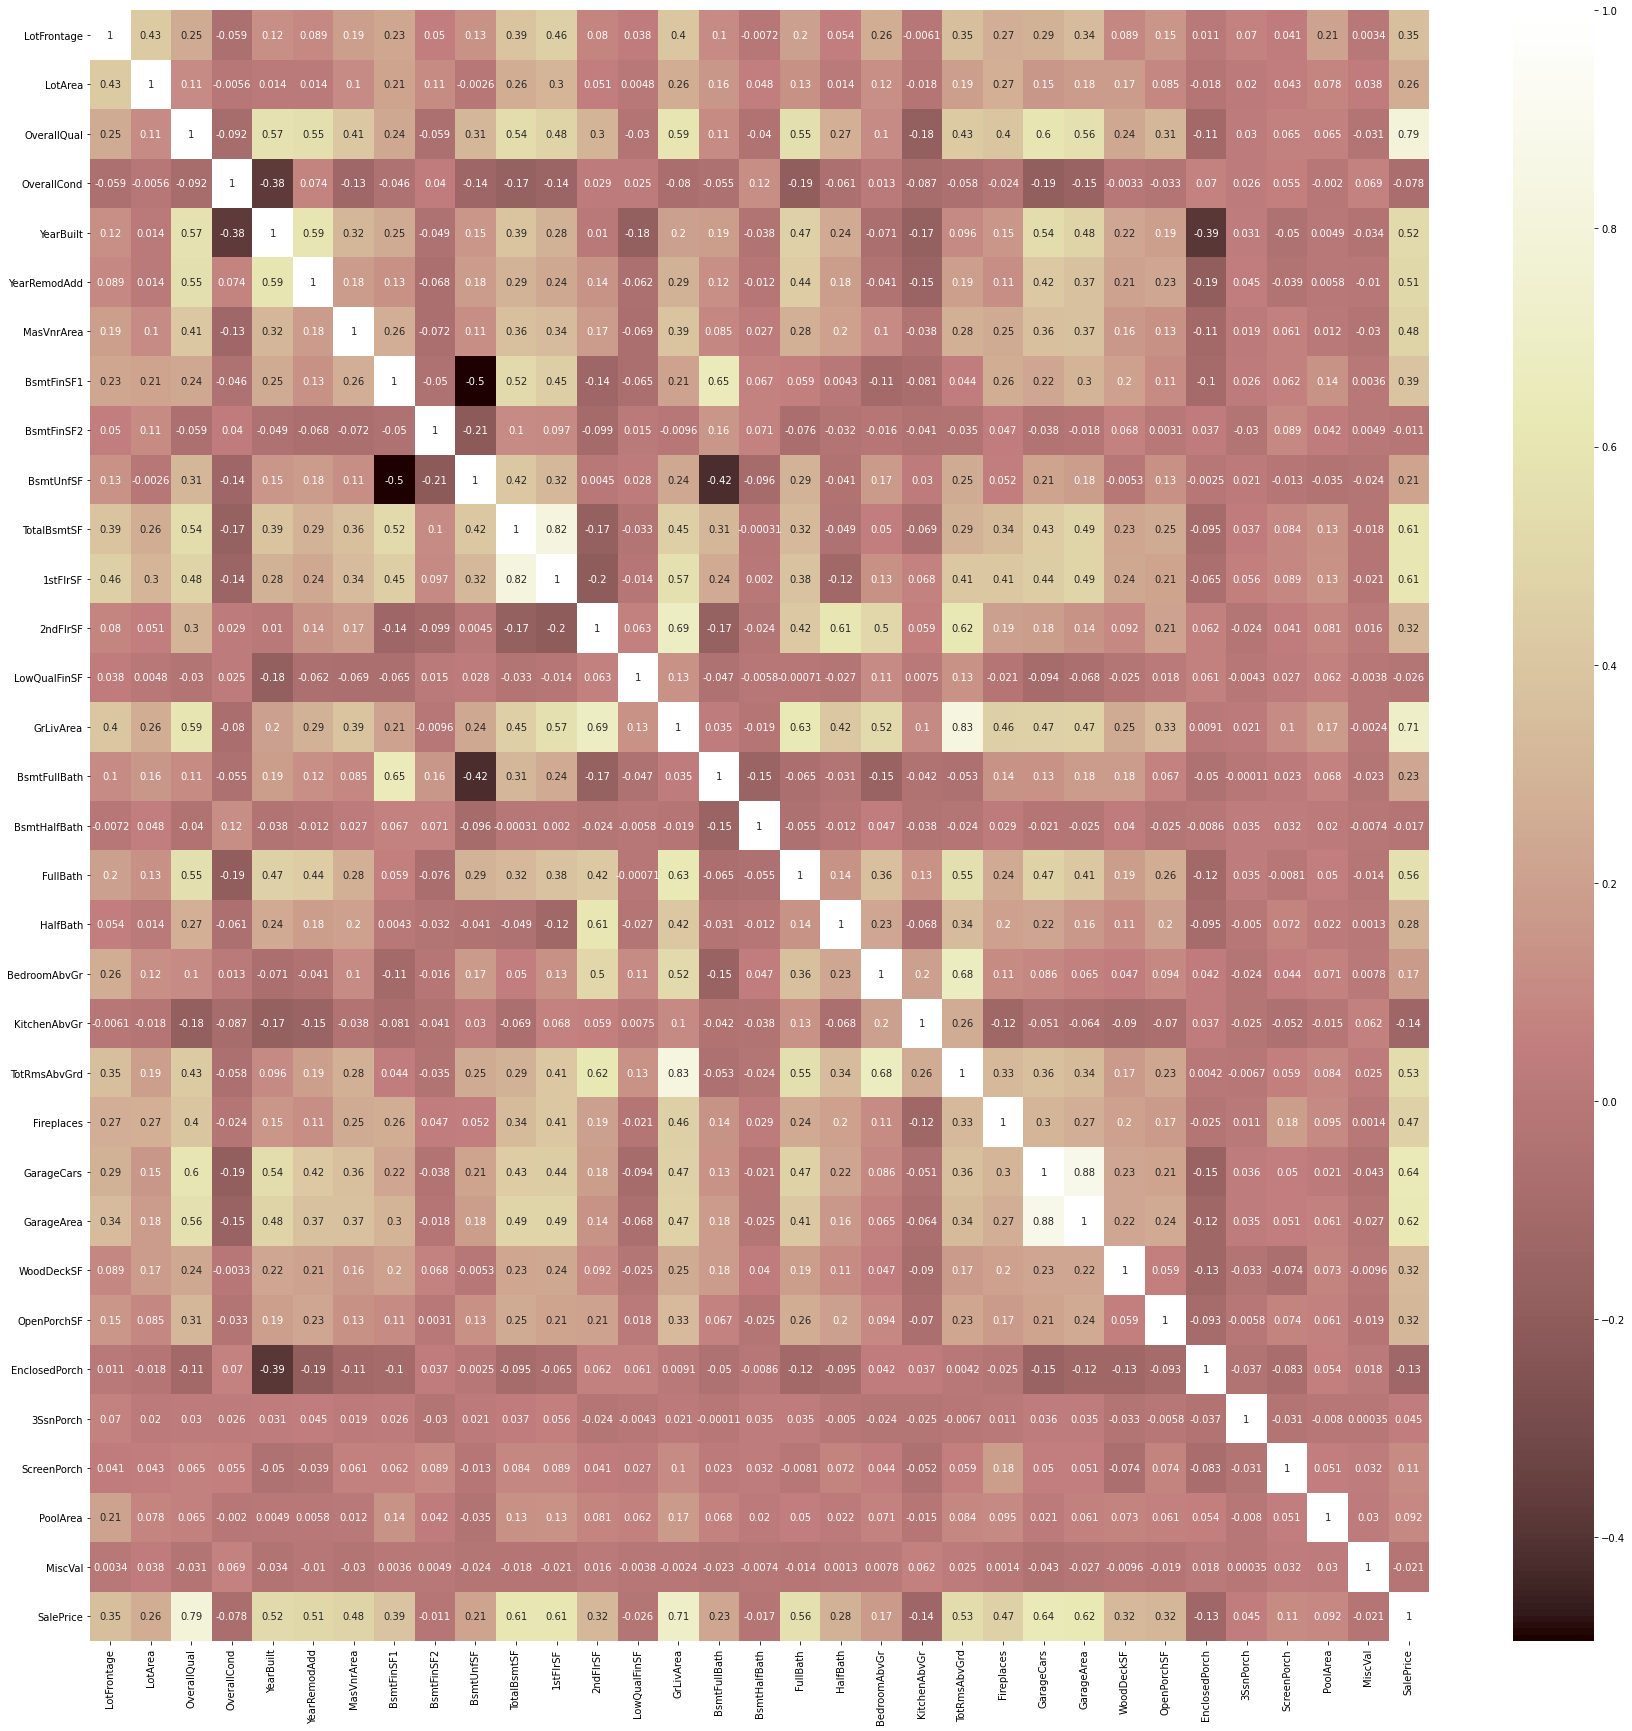

In [222]:
#check the correlation matrix for possible relation between quantitative variables
corr = price_data[numerical_columns].corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr, annot=True, cmap='pink')
plt.show()

Dropping the columns based on high correlation values with other predictors:

In [133]:
price_data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis = 1, inplace = True)

###### EDA on Numerical Features:

<Figure size 720x720 with 0 Axes>

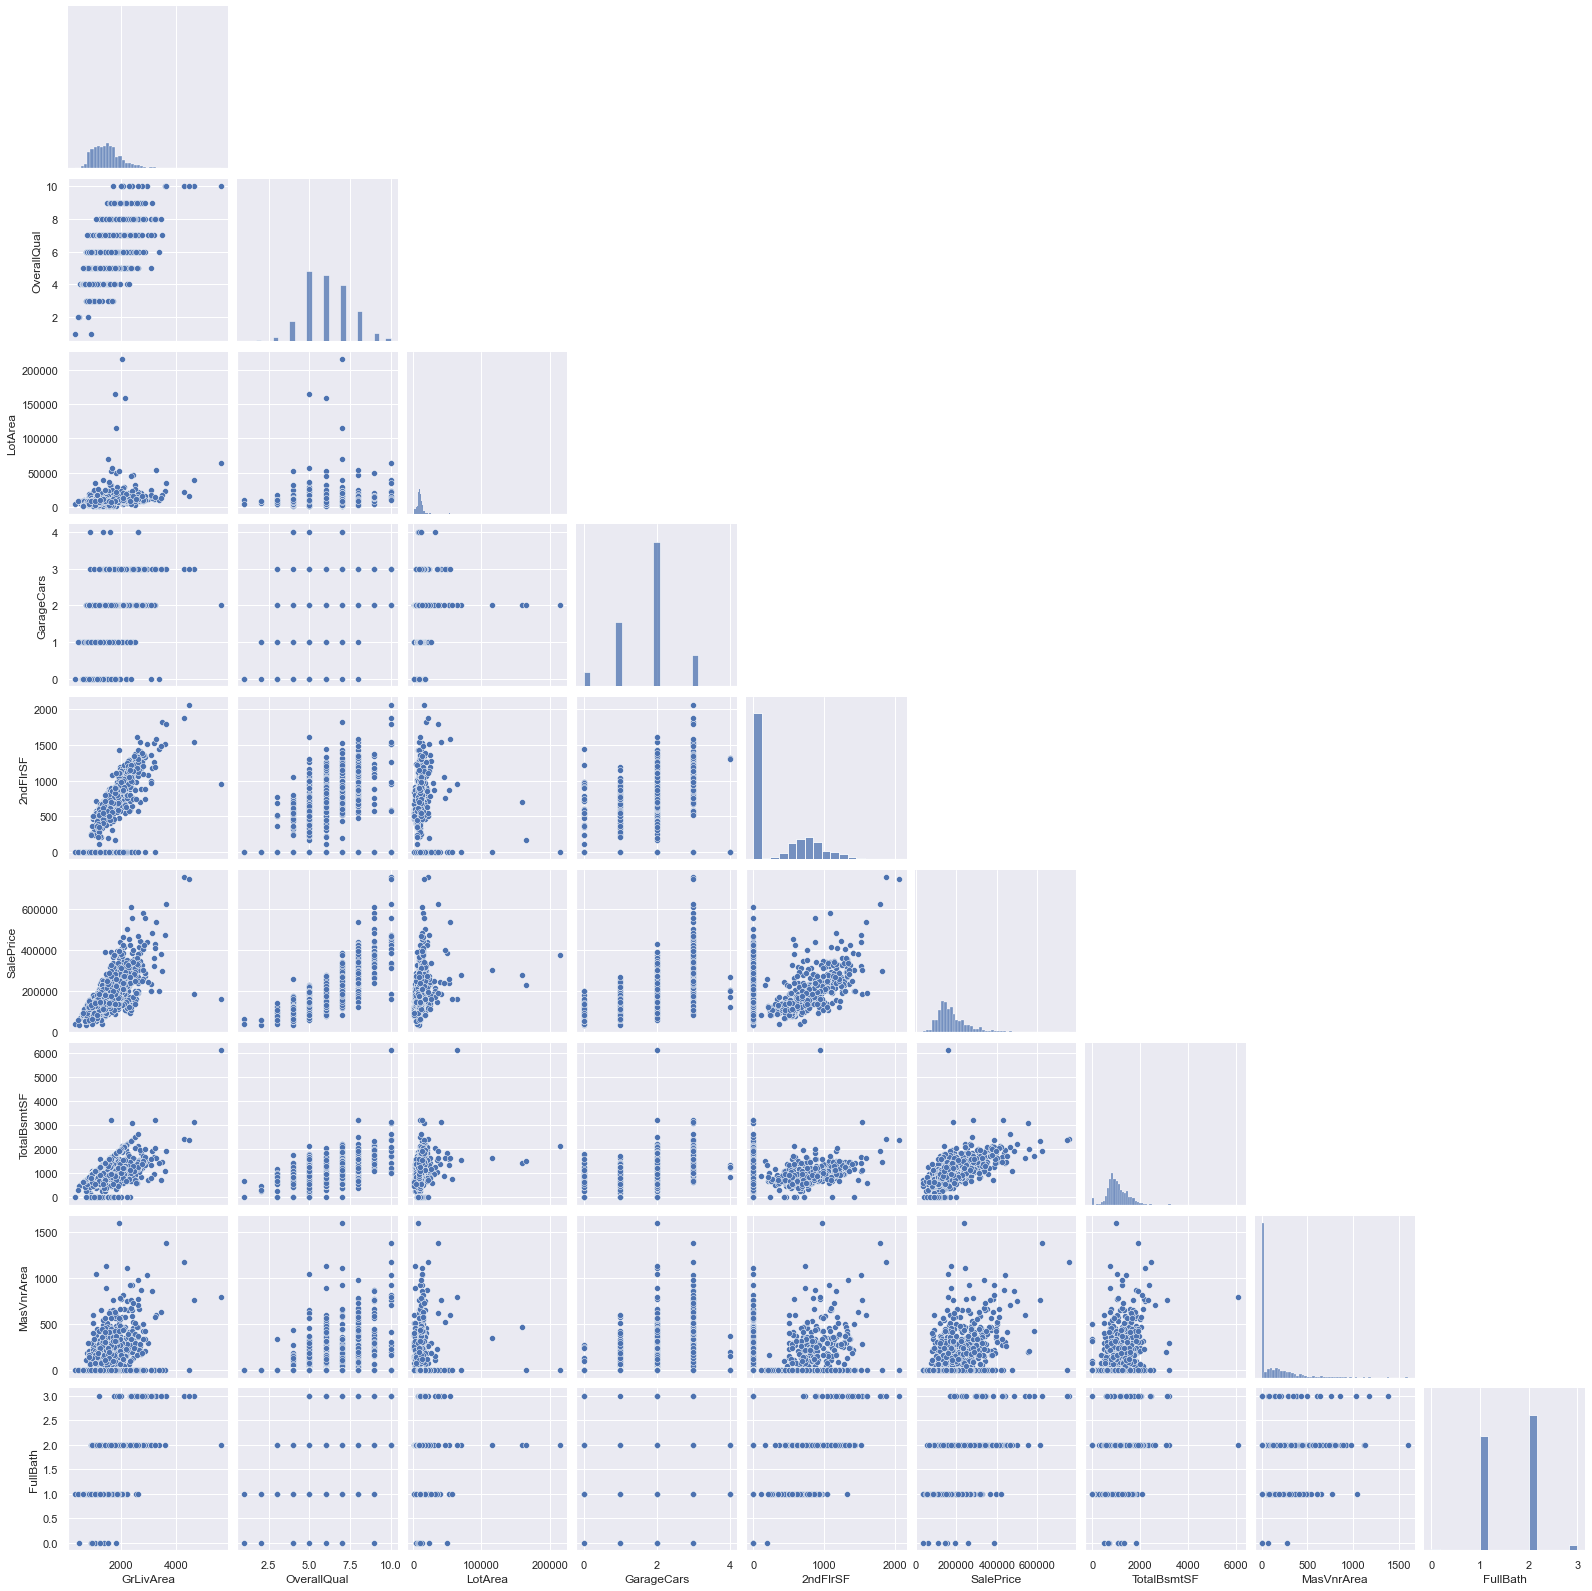

In [135]:
numerical_features = ['GrLivArea','OverallQual','LotArea','GarageCars','2ndFlrSF','SalePrice',
                      'TotalBsmtSF','MasVnrArea','FullBath']
plt.figure(figsize=(10,10))
sns.pairplot(price_data[numerical_features], corner=True)
plt.show()

###### Conclusions drawn from above plots:

- 'GrLvArea', 'OverallQual' and 'GarageCars' are having positive correlation with the target variable 'SalePrice'.

In [136]:
numerical_features = ['GrLivArea','OverallQual','LotArea','GarageCars','2ndFlrSF','SalePrice',
                      'TotalBsmtSF','MasVnrArea','FullBath']

In [137]:
numerical_features.remove('SalePrice')
numerical_features.remove('MasVnrArea')

In [138]:
def univariate_numerical(num_list):
    for num in num_list:
        plt.figure(figsize=(14,5))
        sns.set(style = 'darkgrid')
        corr1, _ = pearsonr(price_data[num], price_data['SalePrice'])
        corr2, _ = spearmanr(price_data[num], price_data['SalePrice'])
        print('Pearsons correlation: {0} for {1}'.format(round(corr1,3),num))
        print('Spearmans correlation: {0} for {1}'.format(round(corr2,3),num))
        sns.jointplot(x=num,y='SalePrice',data = price_data,kind='reg',dropna=True)
        plt.xlabel(num.upper())
        plt.ylabel('SalePrice')
        plt.xticks(rotation = 45)
        plt.show()

Pearsons correlation: 0.709 for GrLivArea
Spearmans correlation: 0.731 for GrLivArea


<Figure size 1008x360 with 0 Axes>

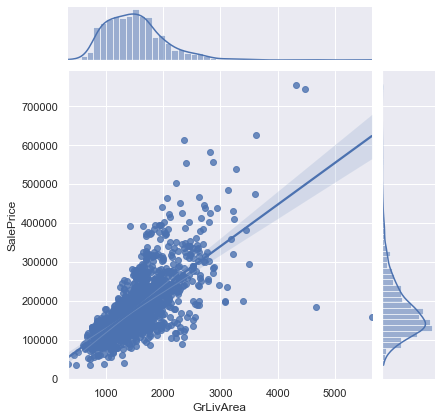

Pearsons correlation: 0.791 for OverallQual
Spearmans correlation: 0.81 for OverallQual


<Figure size 1008x360 with 0 Axes>

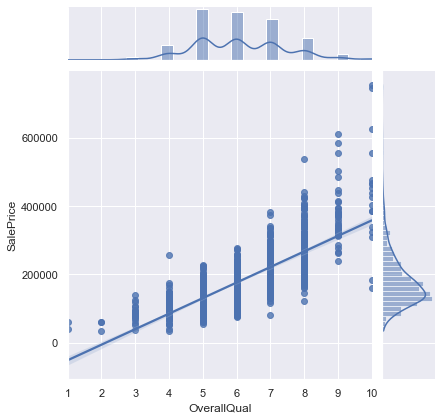

Pearsons correlation: 0.264 for LotArea
Spearmans correlation: 0.456 for LotArea


<Figure size 1008x360 with 0 Axes>

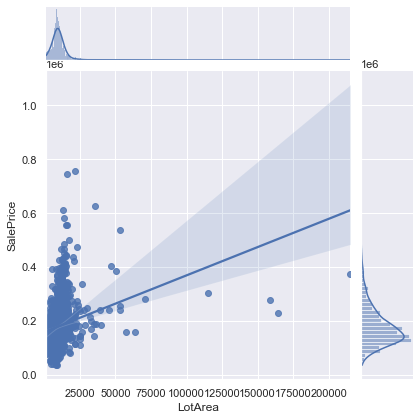

Pearsons correlation: 0.64 for GarageCars
Spearmans correlation: 0.691 for GarageCars


<Figure size 1008x360 with 0 Axes>

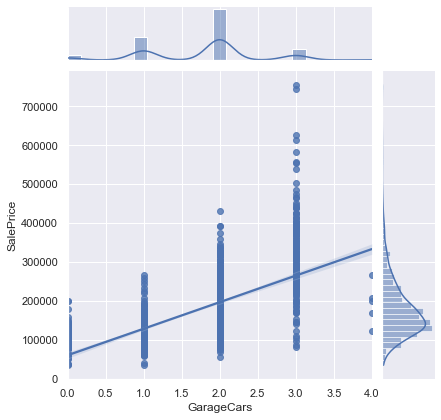

Pearsons correlation: 0.319 for 2ndFlrSF
Spearmans correlation: 0.294 for 2ndFlrSF


<Figure size 1008x360 with 0 Axes>

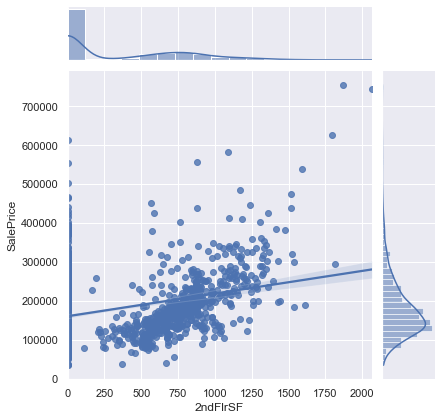

Pearsons correlation: 0.614 for TotalBsmtSF
Spearmans correlation: 0.603 for TotalBsmtSF


<Figure size 1008x360 with 0 Axes>

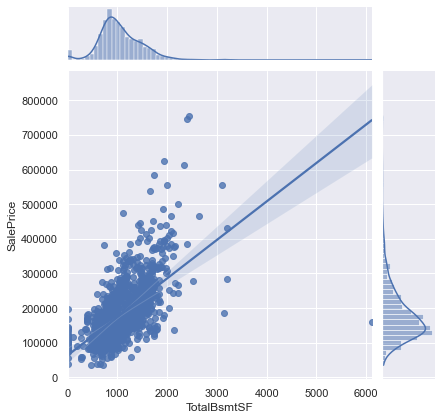

Pearsons correlation: 0.561 for FullBath
Spearmans correlation: 0.636 for FullBath


<Figure size 1008x360 with 0 Axes>

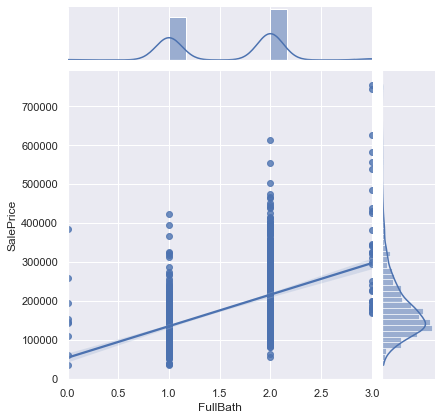

In [139]:
univariate_numerical(numerical_features)

###### Conclusions drawn from above plots:

- 'GrLvArea', 'OverallQual' and 'GarageCars' are having positive correlation with the target variable 'SalePrice' with high pearson value of nearly 0.7.


- '2ndFlrSF'and 'LotArea' are less positively correlated with the target.

In [140]:
price_data.shape

(1460, 71)

In [141]:
price_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'

##### Univariate and Bivariate Analysis on categorical:

In [142]:
categorical_features = ['MSZoning','LotShape','HouseStyle','BldgType','KitchenQual','RoofStyle',
                        'GarageType','CentralAir','Neighborhood','Foundation','Exterior1st','SaleType','SaleCondition']

In [143]:
def plot_categorical_features(cat_list):
    for cat in cat_list:
        plt.figure(figsize=(14,5))
        sns.set(style = 'darkgrid')
        cat_val = price_data[cat].value_counts()
        cat_count = price_data[cat].value_counts().count()
        sns.countplot(x=cat, data = price_data,order = price_data[cat].value_counts().index)
        r1 = cat_val.shape[0]
        for i in range(r1):
            range_count = cat_val[i]
            per = round(((range_count*100)/price_data.shape[0]),2)
            percent = '{}%'.format(per)
            plt.text(i,range_count,percent)
        plt.xlabel(cat.upper())
        plt.ylabel('Count')
        plt.xticks(rotation = 45)
        plt.title('Percentage Distribution of '+cat.upper()+' field')
        plt.show()

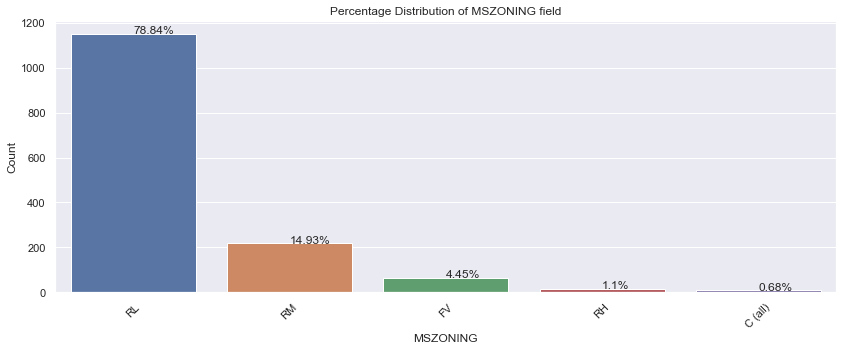

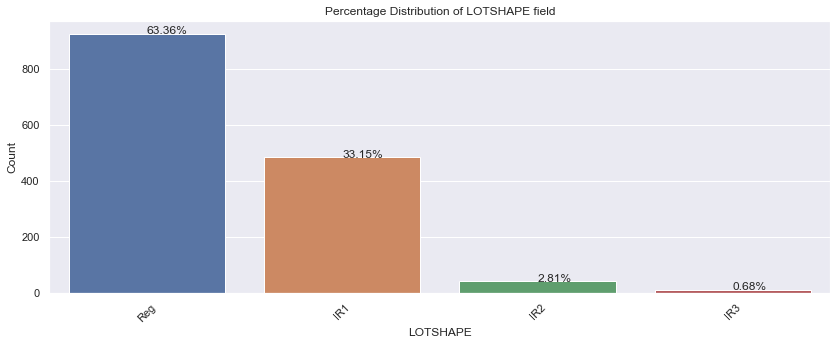

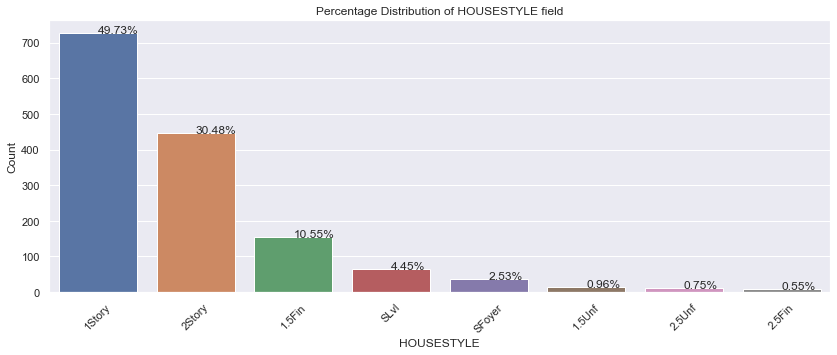

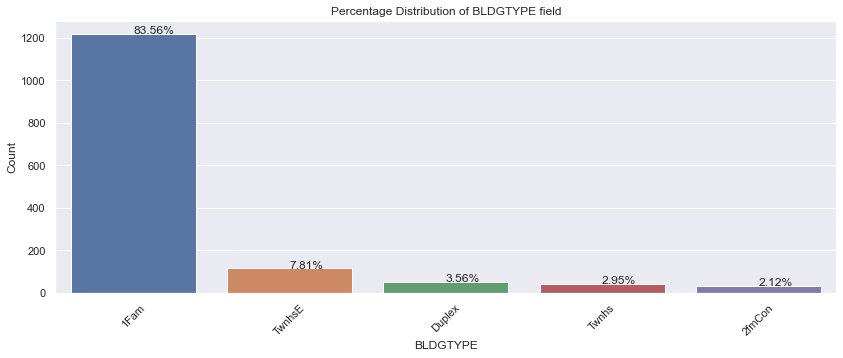

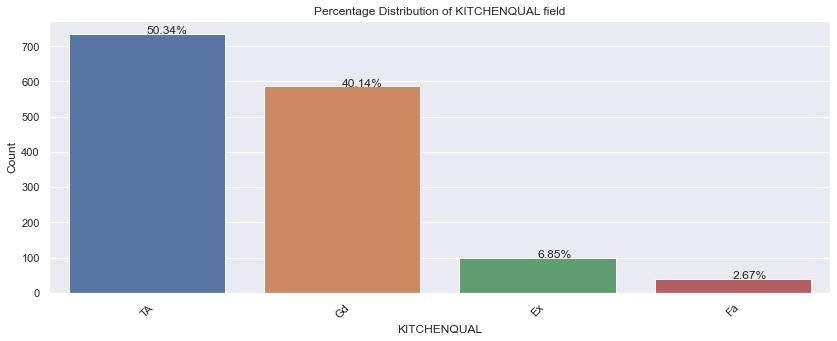

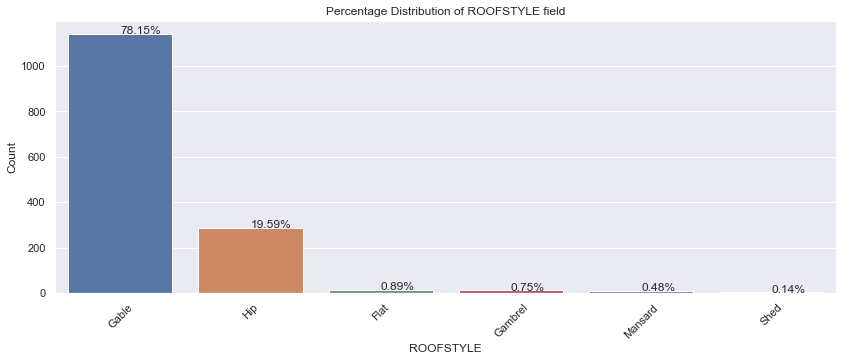

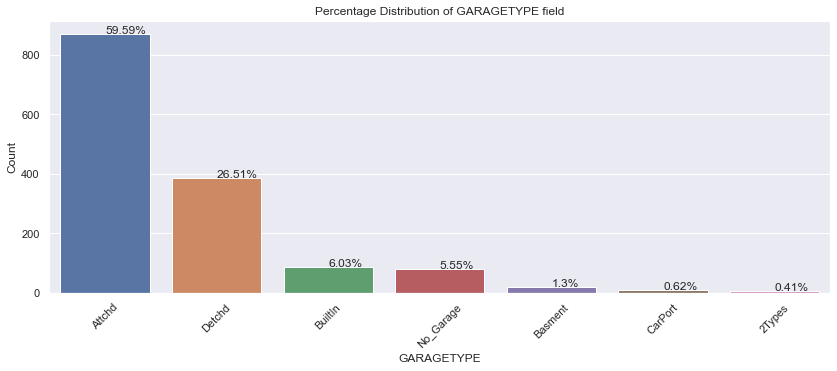

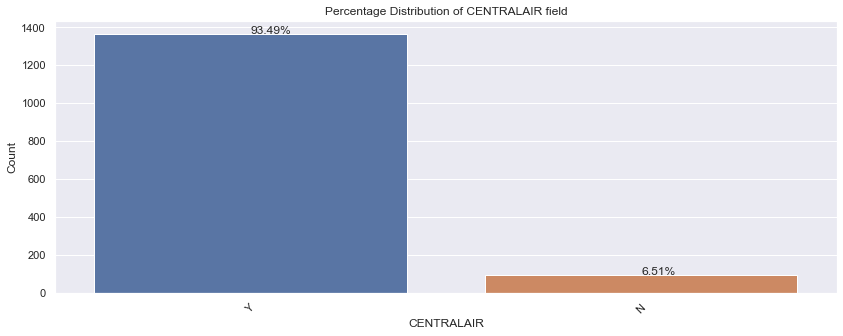

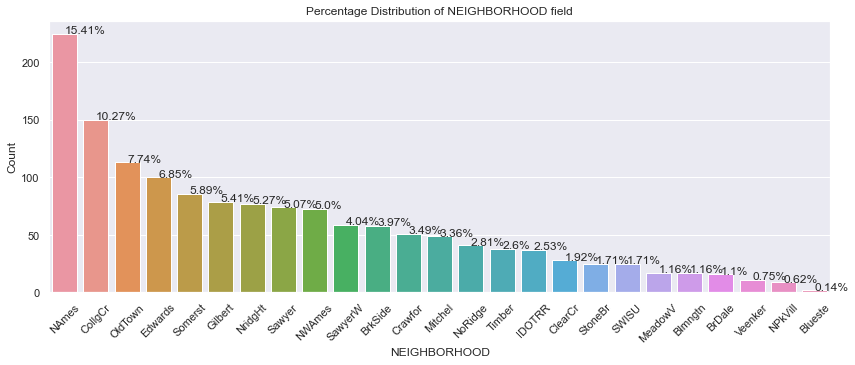

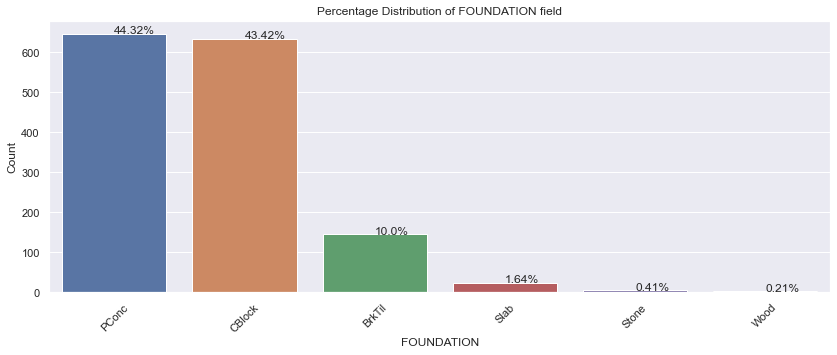

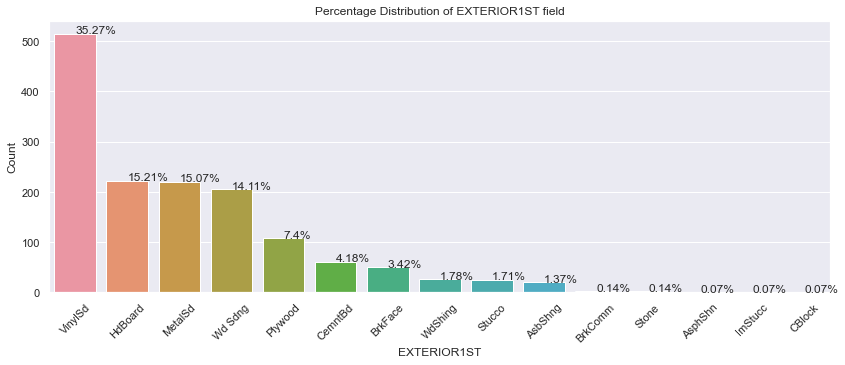

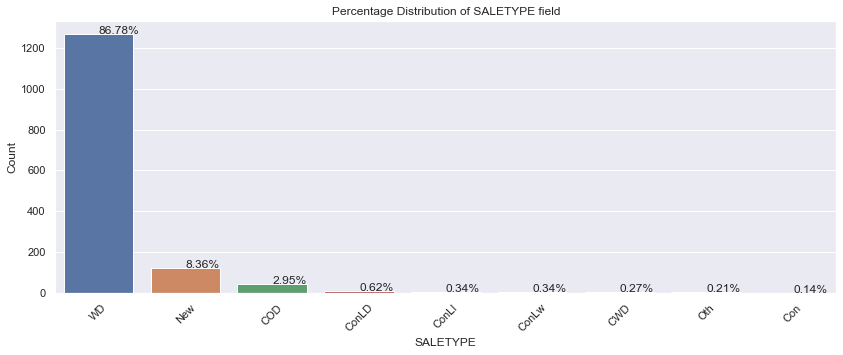

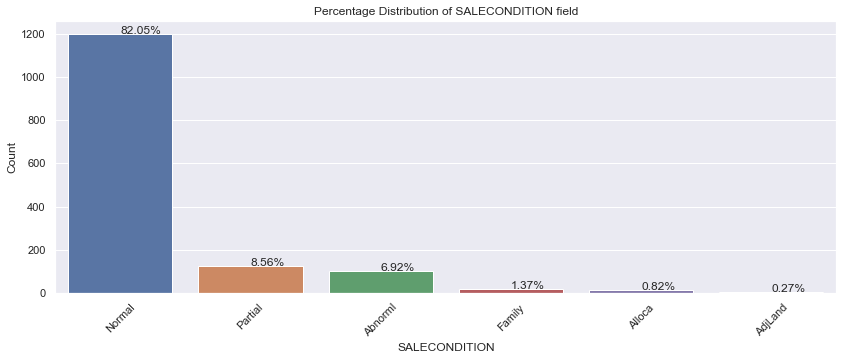

In [144]:
plot_categorical_features(categorical_features)

###### Conclusions drawn the above plots:
- 'MSZoning','BldgType','RoofStyle','CentralAir','SaleType','SaleCondition' have highly skewed distribution among the different levels.
- Majority of the values for 'FOundation' belong to the Level 'PConc' and 'CBlock' with 44.32% and 43.42% count.
- Majority of the values for 'GarageType' belong to class 'Attachd with 59.59% count.

##### Plotting the boxplots to see the distribution of categorical variables wrt target:

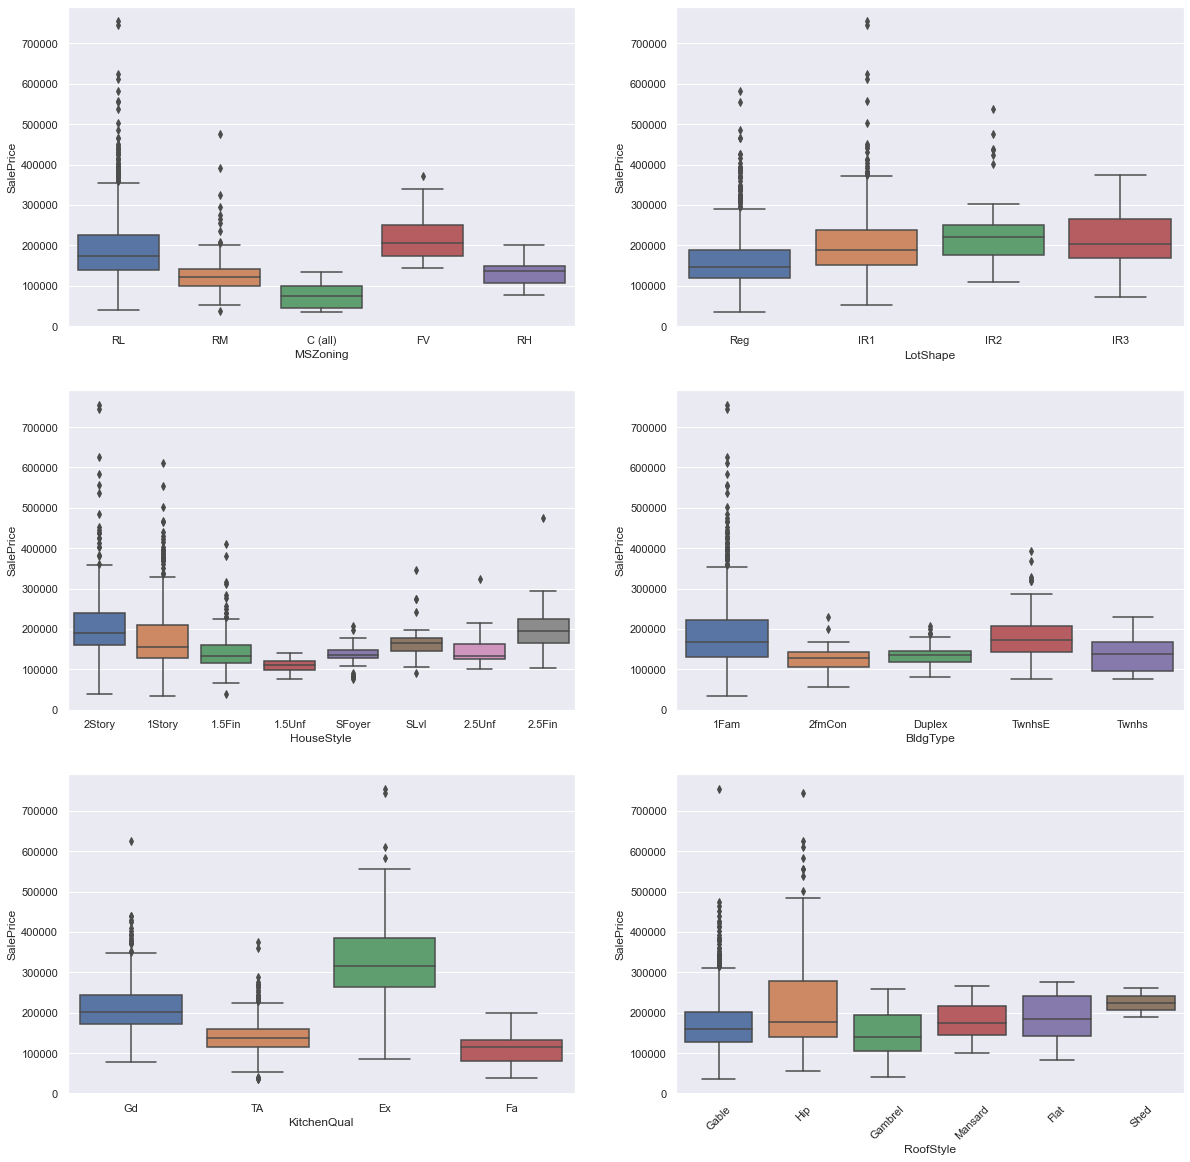

In [145]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='MSZoning',y='SalePrice', data=price_data)
plt.subplot(3,2,2)
sns.boxplot(x='LotShape',y='SalePrice', data=price_data)
plt.subplot(3,2,3)
sns.boxplot(x='HouseStyle',y='SalePrice', data=price_data)
plt.subplot(3,2,4)
sns.boxplot(x='BldgType',y='SalePrice', data=price_data)
plt.subplot(3,2,5)
sns.boxplot(x='KitchenQual',y='SalePrice', data=price_data)
plt.subplot(3,2,6)
sns.boxplot(x='RoofStyle',y='SalePrice', data=price_data)
plt.xticks(rotation = 45)
plt.show()

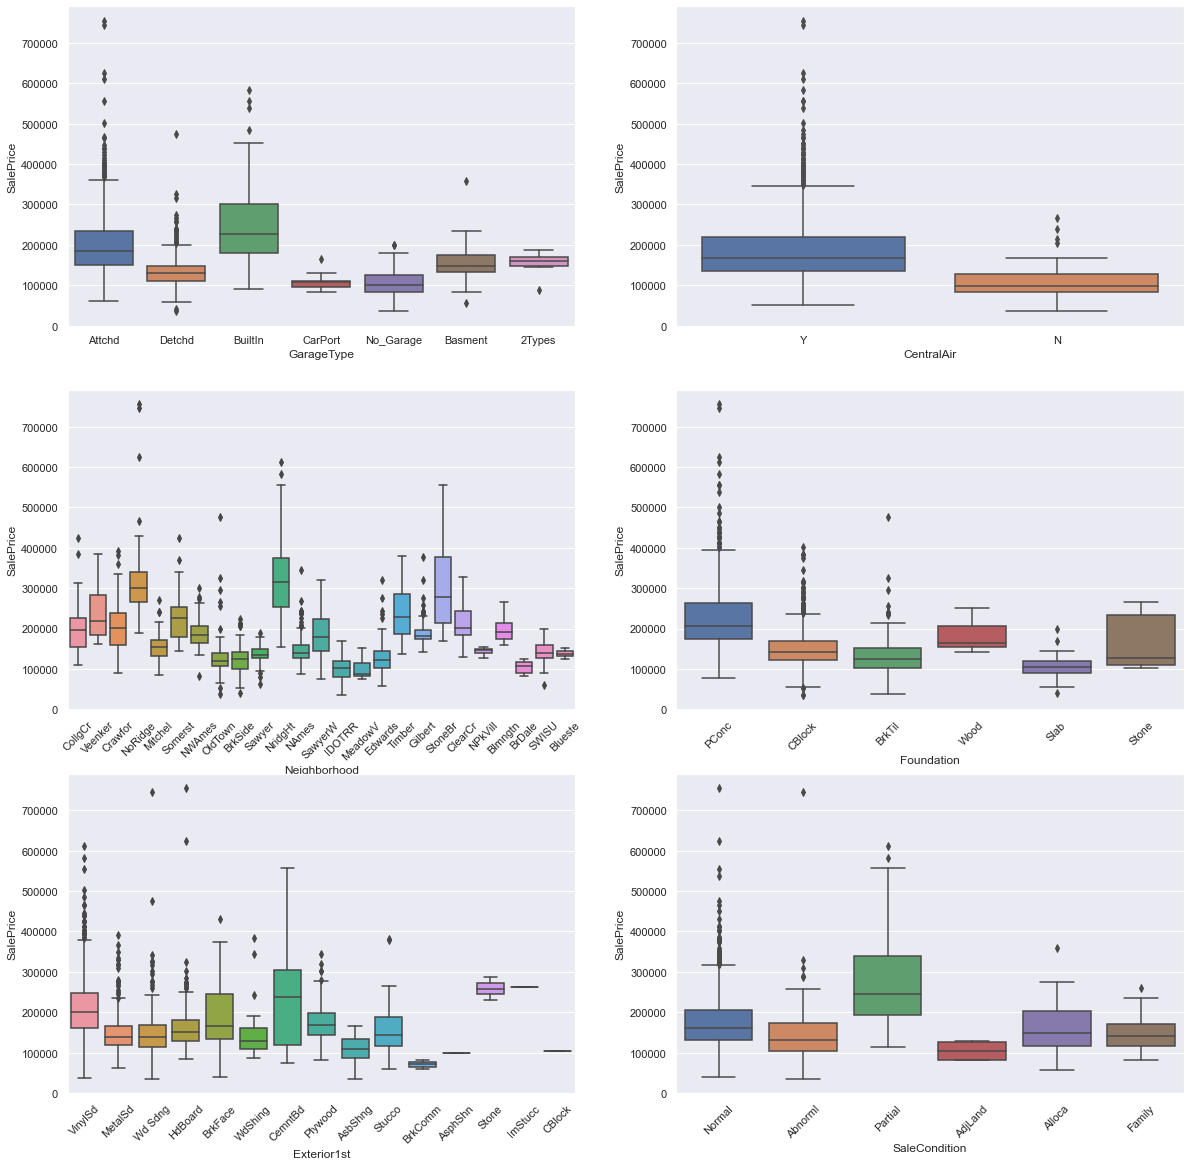

In [146]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='GarageType',y='SalePrice', data=price_data)
plt.subplot(3,2,2)
sns.boxplot(x='CentralAir',y='SalePrice', data=price_data)
plt.subplot(3,2,3)
sns.boxplot(x='Neighborhood',y='SalePrice', data=price_data)
plt.xticks(rotation = 45)
plt.subplot(3,2,4)
sns.boxplot(x='Foundation',y='SalePrice', data=price_data)
plt.xticks(rotation = 45)
plt.subplot(3,2,5)
sns.boxplot(x='Exterior1st',y='SalePrice', data=price_data)
plt.xticks(rotation = 45)
plt.subplot(3,2,6)
sns.boxplot(x='SaleCondition',y='SalePrice', data=price_data)
plt.xticks(rotation = 45)
plt.show()

###### Conclusions drawn from above plots:

- 'SaleCondition' has highest median for level 'Partial'. There are some outliers for level 'Normal'.


- For 'GarageType level 'Detchd' has very less distribution of SalePrice values whereas it is the second highest level in terms of counts. So, inspite of having 26.51% count (meaning this level occures quite frequently in the portfolio of houses) , 'Detchd' doesnt have attract a high sale price. 


-	For 'KitchenQual', level 'Ex' (Excellent) has the largest spread of values for Sale price.

Final categorical columns:

In [147]:
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

- Convert all categorical variables to dummy variables

In [148]:
price_data_dummies = pd.get_dummies(price_data[categorical_columns], drop_first=True)
price_data_dummies.head()

,MSSubClass_1-1/2_STORY_UNFINISHED,MSSubClass_1-STORY_1945_OLDER,MSSubClass_1-STORY_1946_NEWER,MSSubClass_1-STORY_PUD,MSSubClass_1-STORY_W/FINISHED_ATTIC,MSSubClass_2 FAMILY CONVERSION,MSSubClass_2-1/2_STORY,MSSubClass_2-STORY_1945_OLDER,MSSubClass_2-STORY_1946_NEWER,MSSubClass_2-STORY_PUD,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [152]:
#Concatenating the dummy variables with the main dataset:
price_data = pd.concat([price_data, price_data_dummies], axis = 1)
price_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY_1946_NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,1-STORY_1946_NEWER,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,2-STORY_1946_NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,2-STORY_1945_OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,2-STORY_1946_NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [153]:
#Dropping the main Categorical variables:
price_data.drop(price_data[categorical_columns], axis = 1, inplace = True)
price_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [154]:
price_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=266)

#### Creating the Train and Test Dataset:

In [155]:
X = price_data.drop('SalePrice',axis=1)
y = price_data['SalePrice']
print('X Shape : {0}, Y Shape : {1}'.format(X.shape,y.shape))

X Shape : (1460, 265), Y Shape : (1460,)


In [156]:
np.random.seed(0)
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [157]:
print(X_train.shape)
print(y_train.shape)
print('==================')
print(X_test.shape)
print(y_test.shape)

(1021, 265)
(1021,)
(438, 265)
(438,)


Checking for null values in numerical columns:

In [158]:
X_train.isnull().sum().sort_values(ascending = False)

LotFrontage                 177
MasVnrArea                    4
BsmtCond_Po                   0
BsmtFinType1_BLQ              0
BsmtExposure_No_Basement      0
                           ... 
Condition2_Norm               0
Condition2_PosA               0
Condition2_PosN               0
Condition2_RRAe               0
SaleCondition_Partial         0
Length: 265, dtype: int64

Removing Nulls from Numerical columns using Statistical Imputation

In [159]:
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].median())
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
X_train.isnull().sum().sort_values(ascending = False)

LotFrontage              0
BsmtFinType1_LwQ         0
BsmtQual_Fa              0
BsmtQual_Gd              0
BsmtQual_No_Basement     0
                        ..
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
SaleCondition_Partial    0
Length: 265, dtype: int64

Checking for Nulls in Test Data

In [160]:
X_test.isnull().sum().sort_values(ascending = False)

LotFrontage                 82
MasVnrArea                   4
BsmtCond_Po                  0
BsmtFinType1_BLQ             0
BsmtExposure_No_Basement     0
                            ..
Condition2_Norm              0
Condition2_PosA              0
Condition2_PosN              0
Condition2_RRAe              0
SaleCondition_Partial        0
Length: 265, dtype: int64

Removing nulls from test using the same median as learnt from train data

In [161]:
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_train['LotFrontage'].median())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
X_test.isnull().sum().sort_values(ascending = False)

LotFrontage              0
BsmtFinType1_LwQ         0
BsmtQual_Fa              0
BsmtQual_Gd              0
BsmtQual_No_Basement     0
                        ..
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
SaleCondition_Partial    0
Length: 265, dtype: int64

###### Scaling the Train Dataset:

In [163]:
numerical_feat = X_train.select_dtypes(include=['int64','float64']).columns

In [164]:
scaler = MinMaxScaler()
X_train[numerical_feat] = scaler.fit_transform(X_train[numerical_feat])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.444444,0.625,0.384058,0.000000,0.00,0.082920,0.0,0.169521,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.0,0.154110,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.0,0.274401,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.0,0.207620,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.0,0.332620,...,0,0,0,0,1,0,0,0,1,0


In [165]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.165655,0.042143,0.565676,0.572723,0.719215,0.582305,0.065306,0.079337,0.033980,0.241388,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.075641,0.048226,0.155529,0.136506,0.219897,0.343843,0.117088,0.082377,0.115907,0.192066,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.027923,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,0.092466,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.160959,0.037531,0.555556,0.500000,0.731884,0.733333,0.000000,0.069454,0.000000,0.197774,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.195205,0.046943,0.666667,0.625000,0.927536,0.900000,0.098750,0.126152,0.000000,0.345034,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since we are following a MinMax Scaler the values of all the variables now lie between 0 and 1. This took care of the outlier problem as well.

###### Applying the scaling on the Test Dataset:

In [166]:
X_test[numerical_feat] = scaler.transform(X_test[numerical_feat])
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.0,0.106164,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.0,0.368151,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.0,0.529538,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.0,0.401969,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.0,0.245719,...,0,0,0,0,1,0,0,0,1,0


In [167]:
X_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.169075,0.042633,0.568493,0.570205,0.719195,0.577816,0.062596,0.076725,0.026057,0.246481,...,0.004566,0.002283,0.095890,0.0,0.860731,0.002283,0.009132,0.013699,0.808219,0.102740
std,0.075108,0.043013,0.149493,0.145223,0.216762,0.345295,0.102883,0.077114,0.092662,0.182468,...,0.067496,0.047782,0.294778,0.0,0.346623,0.047782,0.095235,0.116370,0.394152,0.303966
min,0.000000,-0.000828,0.000000,0.125000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029354,0.444444,0.500000,0.594203,0.266667,0.000000,0.000000,0.000000,0.108947,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.160959,0.037005,0.555556,0.500000,0.724638,0.716667,0.000000,0.063873,0.000000,0.214255,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.202055,0.047823,0.666667,0.625000,0.934783,0.900000,0.108750,0.125753,0.000000,0.346533,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.736888,1.000000,1.000000,0.992754,1.000000,0.575625,0.387668,0.764586,0.828339,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelling Process:

### 1. LINEAR REGRESSION WITH NO RFE OR REGULARIZATION

In [168]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [170]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.9505849464482505
Test R2:  -2.97498104839137e+21
Train MSE:  308817407.3200222
Test MSE:  1.9145242827980562e+31


The OLS model is very heavily overfitting.

### 2. LINEAR REGRESSION WITH RFE 80 AND NO REGULARIZATION

In [171]:
lm_2 = LinearRegression()
lm_2.fit(X_train, y_train)

rfe = RFE(lm_2, 80)           
rfe = rfe.fit(X_train, y_train)

In [172]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 28),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('BsmtHalfBath', False, 150),
 ('FullBath', False, 131),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 152),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 65),
 ('OpenPorchSF', False, 48),
 ('EnclosedPorch', False, 93),
 ('3SsnPorch', False, 81),
 ('ScreenPorch', False, 104),
 ('PoolArea', True, 1),
 ('MiscVal', False, 15),
 ('MSSubClass_1-1/2_STORY_UNFINISHED', False, 163),
 ('MSSubClass_1-STORY_1945_OLDER', False, 53),
 ('MSSubClass_1-STORY_1946_NEWER', False, 183),
 ('MSSubClass_1-STORY_PUD', False, 32),
 ('MSSubClass_1-STORY_W/FINI

In [173]:
#Creating a list containing all the variables that are chosen from RFE:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'MSSubClass_2 FAMILY CONVERSION',
       'MSSubClass_DUPLEX', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_NoRidge', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po',


In [174]:
#Removing all the non important variables from X_train:
X_train.columns[~rfe.support_]

Index(['YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       ...
       'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=185)

In [175]:
# Creating X_train with RFE selected variables:
X_train_25_rfe = X_train[col]
X_test_25_rfe = X_test[col]

In [176]:
print(X_train_25_rfe.shape)
print(X_test_25_rfe.shape)

(1021, 80)
(438, 80)


- Fitting a Linear Regression on 80 features selected from RFE:

In [177]:
lm_rfe = LinearRegression()

# Fit a line
lm_rfe.fit(X_train_25_rfe, y_train)

LinearRegression()

In [178]:
y_pred_train = lm_rfe.predict(X_train_25_rfe)
y_pred_test = lm_rfe.predict(X_test_25_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.9283660148469846
Test R2:  -5.97431183528643e+20
Train MSE:  447673734.64016
Test MSE:  3.844718637064401e+30


Even after using 80 best features we can see that the model is heavily overfitting as the test R2 suggests that this is worse than an average model.

### 3. LINEAR REGRESSION WITH 15 RFE AND NO REGULARISATION

In [179]:
lm_2 = LinearRegression()
lm_2.fit(X_train, y_train)

rfe = RFE(lm_2, 15)           
rfe = rfe.fit(X_train, y_train)

In [180]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 6),
 ('YearBuilt', False, 5),
 ('YearRemodAdd', False, 93),
 ('MasVnrArea', False, 54),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 26),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 51),
 ('LowQualFinSF', False, 13),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 103),
 ('BsmtHalfBath', False, 215),
 ('FullBath', False, 196),
 ('HalfBath', False, 89),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', False, 12),
 ('Fireplaces', False, 217),
 ('GarageCars', False, 22),
 ('WoodDeckSF', False, 130),
 ('OpenPorchSF', False, 113),
 ('EnclosedPorch', False, 158),
 ('3SsnPorch', False, 146),
 ('ScreenPorch', False, 169),
 ('PoolArea', False, 16),
 ('MiscVal', False, 80),
 ('MSSubClass_1-1/2_STORY_UNFINISHED', False, 228),
 ('MSSubClass_1-STORY_1945_OLDER', False, 118),
 ('MSSubClass_1-STORY_1946_NEWER', False, 248),
 ('MSSubClass_1-STORY_PUD', False, 97),
 (

In [181]:
#Creating a list containing all the variables that are chosen from RFE:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev'],
      dtype='object')

In [182]:
#Removing all the non important variables from X_train:
X_train.columns[~rfe.support_]

Index(['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [183]:
# Creating X_train with RFE selected variables:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [184]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(1021, 15)
(438, 15)


In [185]:
lm_rfe = LinearRegression()

# Fit a line
lm_rfe.fit(X_train_rfe, y_train)

LinearRegression()

In [186]:
y_pred_train = lm_rfe.predict(X_train_rfe)
y_pred_test = lm_rfe.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.8400292691775426
Test R2:  0.7250093411883813
Train MSE:  999730705.299043
Test MSE:  1769679487.9488564


Even after using 15 best features we can see that the model is still overfitting.

### 4. RIDGE REGRESSION WITH NO RFE

In [187]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross Validation with 5 folds
folds = 5 
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [188]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [189]:
#Fitting Ridge model for alpha = 5
alpha = 5
ridge_noRfe = Ridge(alpha=alpha)

ridge_noRfe.fit(X_train, y_train)

Ridge(alpha=5)

In [190]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_noRfe.predict(X_train)
y_pred_test = ridge_noRfe.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.8934951153861194
Test R2:  0.8632758216096361
Train MSE:  665598030.7485127
Test MSE:  879877065.8236786


The train and test R2 suggests that we are getting a good fit model here.

Lets check whether the assumptions of the linear regression are met here or not!!

###### Residual Analysis:

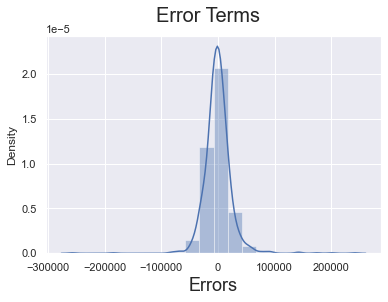

In [192]:
y_train_cnt = ridge_noRfe.predict(X_train)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors follow a normal distribution with mean = 0. The assumption is verified here and it holds true.

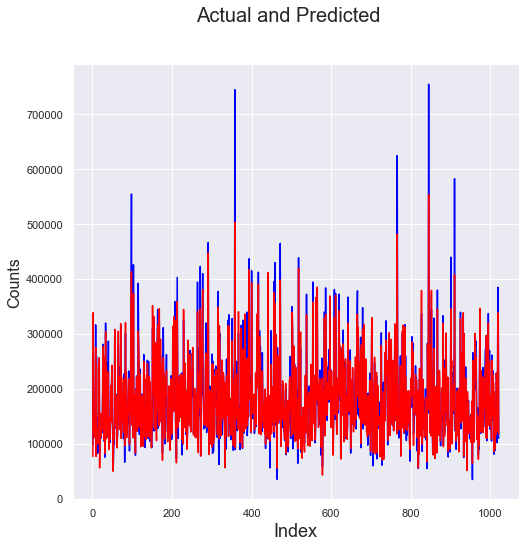

In [193]:
#Actual vs Predicted
c = [i for i in range(1,1022,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train_cnt, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

The actual and the predicted target values are very similar. The predicted target values are able to capture the highs and lows properly and hence the model is considered a good predictor.

##### Homoscedasticity Assumption Check :

Text(0, 0.5, 'Error')

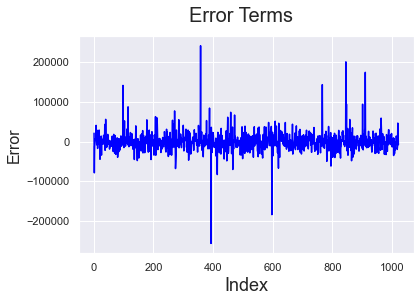

In [194]:
# Error terms
c = [i for i in range(1,1022,1)]
fig = plt.figure()
plt.plot(c,y_train - y_train_cnt, color="blue", linewidth=1.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)            
plt.xlabel('Index', fontsize=18)                  
plt.ylabel('Error', fontsize=16)   

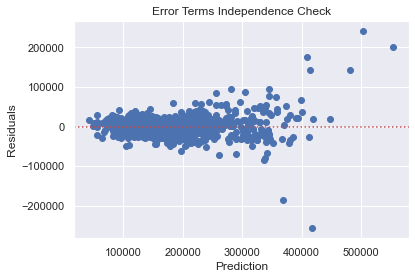

In [195]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

Variance in the error is remaining nearly constant.

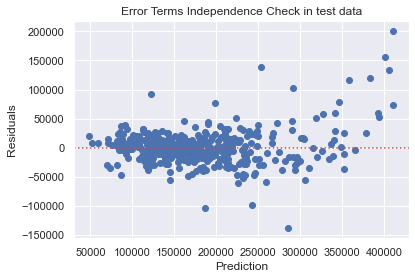

In [197]:
y_test_cnt = ridge_noRfe.predict(X_test)
plt.scatter(y_test_cnt,(y_test - y_test_cnt))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check in test data')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

###### Checking the relationship between y_test and y_pred:

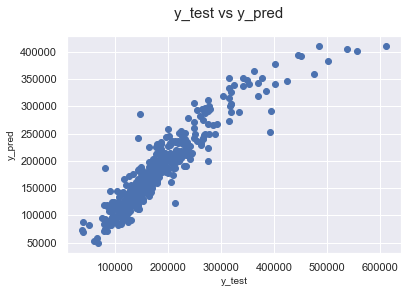

In [198]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 10)                   
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

It follows a linear relationship signifying that the predicted target values are approximately similar to the test data.

### 5. RIDGE REGRESSION WITH RFE OF 80 FEATURES

In [207]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_25_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [208]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


In [209]:
#Fitting Ridge model for alpha = 0.05
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_25_rfe, y_train) #

Ridge(alpha=0.05)

In [210]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train = ridge.predict(X_train_25_rfe)
y_pred_test = ridge.predict(X_test_25_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.9201437814918083
Test R2:  0.8208559704721323
Train MSE:  499058254.2272255
Test MSE:  1152866485.7708867


Ridge with Rfe is not performing as well as Ridge without RFE.

###### Residual Analysis:

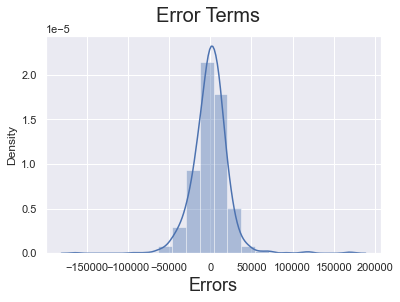

In [211]:
y_train_ridgeRfe = ridge.predict(X_train_25_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_ridgeRfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors follow a normal distribution with mean = 0. The assumption is verified here and it holds true.

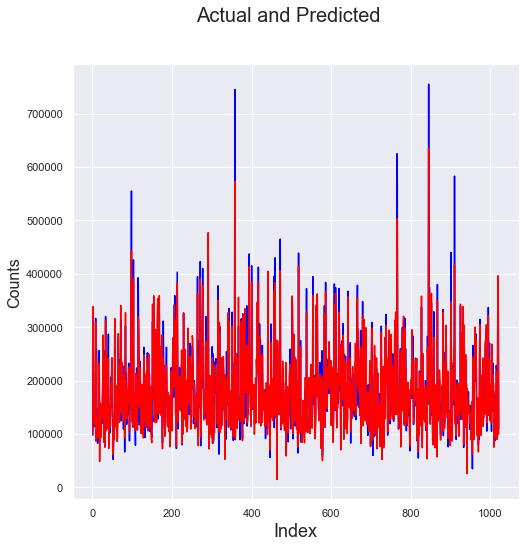

In [212]:
#Actual vs Predicted
c = [i for i in range(1,1022,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train_ridgeRfe, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

The actual and the predicted target values are very similar. The predicted target values are able to capture the highs and lows properly and hence the model is considered a good predictor.

##### Homoscedasticity Assumption Check :

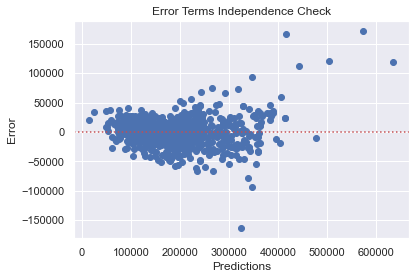

In [213]:
plt.scatter(y_train_ridgeRfe,(y_train - y_train_ridgeRfe))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check')
plt.ylabel('Error')
plt.xlabel('Predictions')
plt.show()

###### Checking the relationship between y_test and y_pred:

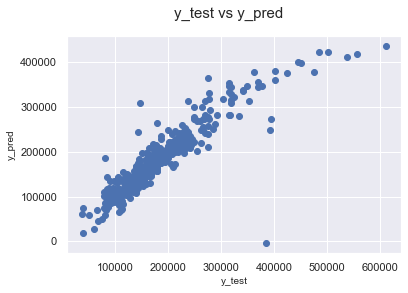

In [214]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 10)                   
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

### 6. LASSO REGRESSION WITH RFE OF 80 FEATURES

In [215]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_25_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [216]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [217]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_25_rfe, y_train) 

Lasso(alpha=20)

In [218]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train = lasso.predict(X_train_25_rfe)
y_pred_test = lasso.predict(X_test_25_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.920239115664139
Test R2:  0.8210763603807013
Train MSE:  498462467.1175882
Test MSE:  1151448184.864845


The gap between Train and Test R2 score suggests that the Lasso model with 80 RFE features is overfitting.

### 7. LASSO REGRESSION WITH NO RFE

In [219]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [221]:
#Selecting 50 as alpha value as it was giving better R2 score.
alpha =50

lasso_noRfe = Lasso(alpha=alpha)
        
lasso_noRfe.fit(X_train, y_train) 

Lasso(alpha=50)

In [222]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train = lasso_noRfe.predict(X_train)
y_pred_test = lasso_noRfe.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ',mse_test_lr)

Train R2:  0.9111300703169387
Test R2:  0.8553821627320004
Train MSE:  555389082.8974736
Test MSE:  930676050.2727712


Lasso Regression without RFE is performing much better than with RFE. The smaller gap between Train and Test R2 score tells us that the model is not overfitting.

###### Residual Analysis:

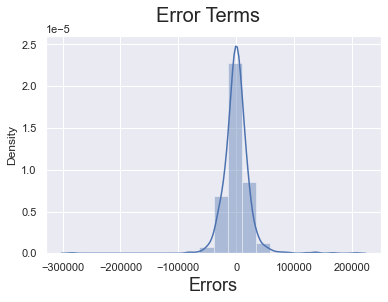

In [223]:
y_train_lassoNoRfe = lasso_noRfe.predict(X_train)
fig = plt.figure()
sns.distplot((y_train - y_train_lassoNoRfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors follow a normal distribution with mean = 0. The assumption is verified here and it holds true.

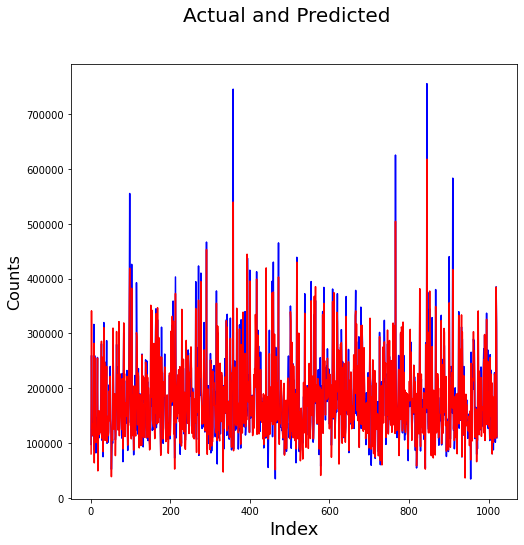

In [690]:
#Actual vs Predicted
c = [i for i in range(1,1022,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train_lassoNoRfe, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

The actual and the predicted target values are very similar. The predicted target values are able to capture the highs and lows properly and hence the model is considered a good predictor.

##### Homoscedasticity Assumption Check :

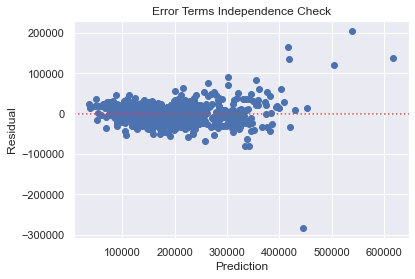

In [225]:
plt.scatter(y_train_lassoNoRfe,(y_train - y_train_lassoNoRfe))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

Error terms are having a near constant variance.

###### Checking the relationship between y_test and y_pred:

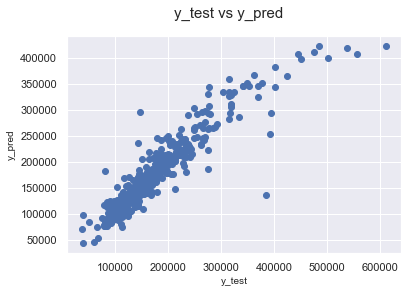

In [226]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 15)  
plt.xlabel('y_test', fontsize = 10)                   
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

#### So, we are selecting the Ridge Regression (without RFE) having alpha = 5.0 and Lasso regression (without RFE) with alpha 50.0 as the final models.

- Building a dataframe to keep all the coefficients of two models along with the features together.

In [228]:
betas = pd.DataFrame()
betas['Features'] = X_train.columns

In [229]:
betas['Ridge'] = ridge_noRfe.coef_
betas['Lasso'] = lasso_noRfe.coef_

In [230]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Features,Ridge,Lasso
0,LotFrontage,-1078.175008,-3480.715044
1,LotArea,21281.510496,44251.597285
2,OverallQual,62372.587771,84008.625688
3,OverallCond,20449.547674,30385.918254
4,YearBuilt,4189.227395,12830.585220
5,YearRemodAdd,10080.179886,6205.707738
6,MasVnrArea,25057.272798,25206.930416
7,BsmtFinSF1,17531.038248,0.000000
8,BsmtFinSF2,8752.188706,0.000000
9,BsmtUnfSF,21638.434951,2253.889643


We can see that Lasso performed feature selection by making the coefficients of all non-important predictors to 0.0

##### Plotting the top 20 features of Ridge and Lasso Model:

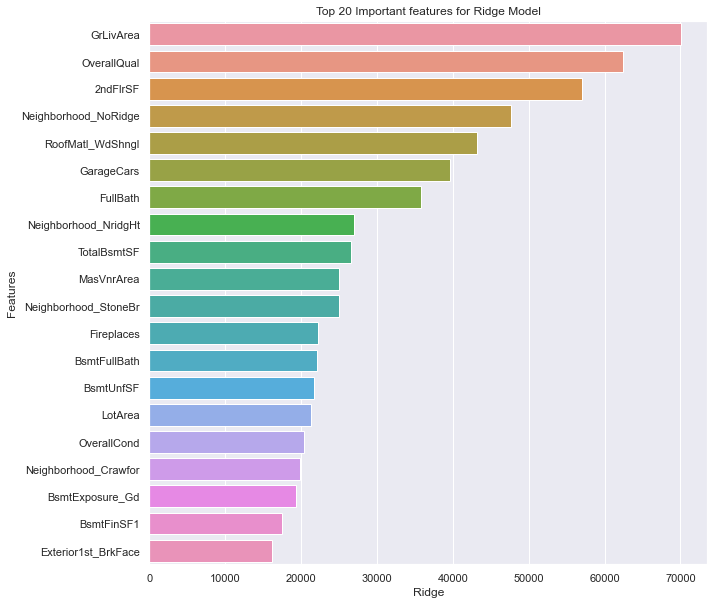

In [231]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Ridge', data=betas.sort_values(by='Ridge', ascending = False).head(20))
plt.title('Top 20 Important features for Ridge Model')
plt.show()

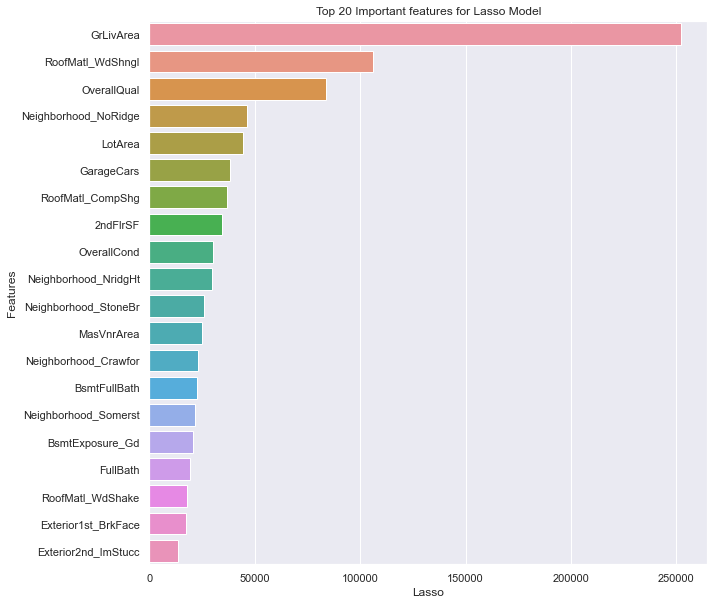

In [232]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Lasso', data=betas.sort_values(by='Lasso', ascending = False).head(20))
plt.title('Top 20 Important features for Lasso Model')
plt.show()

##### CONCLUSION:

- 'GrLvArea' is the most important predictor for house price prediction problem.
- 'OverallQual' and 'Neighbourhood_NoRidge' came out as important predictors from both the models.

The Ridge and Lasso model can predict an approx 85% variation of the underlying sale price.

#### SUBJECTIVE QUESTIONS:

### QUESTION 1: 
- What is the optimal value of alpha for ridge and lasso regression? 


   Ridge : 5
   
   Lasso : 50
   
- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 


   Updated Ridge : 10
   
   Updated Lasso : 100

- Updated Ridge

In [234]:
alpha = 10
updated_ridge = Ridge(alpha=alpha)

updated_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [235]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train = updated_ridge.predict(X_train)
y_pred_test = updated_ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ', r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ', mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ', mse_test_lr)

Train R2:  0.8807696431446839
Test R2:  0.8562089004039186
Train MSE:  745125362.2408793
Test MSE:  925355648.8226606


The Train and Test R2 suggest that the ridge model with alpha = 10.0 is not overfiting.

- Updated Lasso:

In [236]:
alpha =100

updated_lasso = Lasso(alpha=alpha)
        
updated_lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [237]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train = updated_lasso.predict(X_train)
y_pred_test = updated_lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ', r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ', mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ', mse_test_lr)

Train R2:  0.9008516907856746
Test R2:  0.8607915168812594
Train MSE:  619623406.0470394
Test MSE:  895864602.049897


The Train and Test R2 suggest that the lasso model with alpha = 100.0 is not overfiting.

- What will be the most important predictor variables for RIDGE after the change is implemented?

In [238]:
betas['Updated_Ridge'] = updated_ridge.coef_
betas['Updated_Lasso'] = updated_lasso.coef_

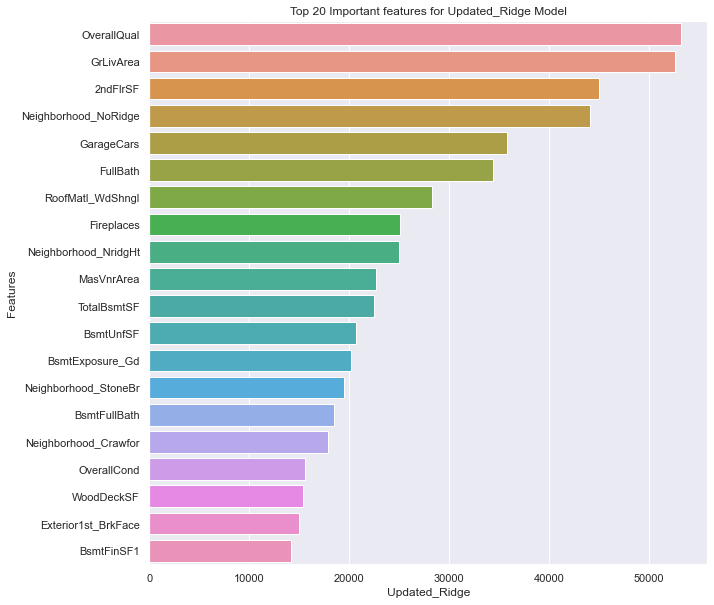

In [239]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Updated_Ridge', data=betas.sort_values(by='Updated_Ridge', ascending = False).head(20))
plt.title('Top 20 Important features for Updated_Ridge Model')
plt.show()

- What will be the most important predictor variables for LASSO after the change is implemented?

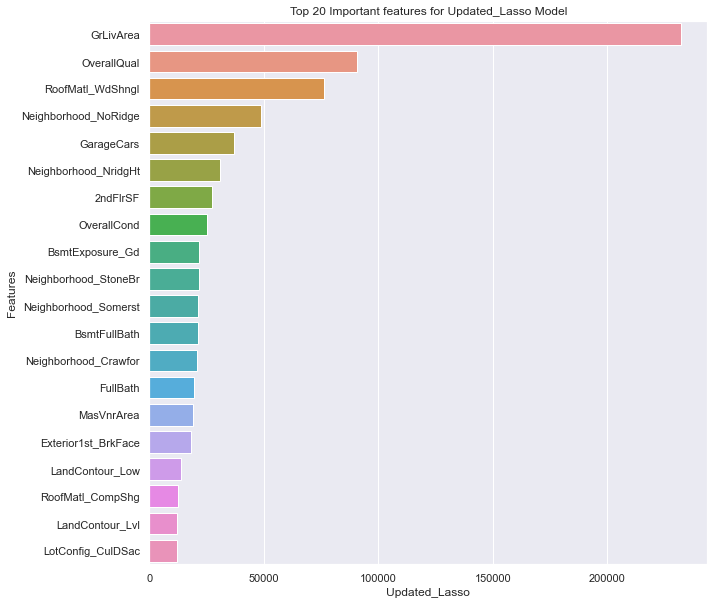

In [240]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Updated_Lasso', data=betas.sort_values(by='Updated_Lasso', ascending = False).head(20))
plt.title('Top 20 Important features for Updated_Lasso Model')
plt.show()

- CONCLUSION:

We see features like ‘GrLvArea’, ‘OverallQual’, ‘Neibourhood_NoRidge’, ‘GarageCars’ came out to be important for both the updated Ridge and Lasso Model. So, we can conclude that these features are major predictors for the House Price Prediction Problem.

### QUESTION 3: 
- After building the model, you realised that the **five** most important predictor variables in the lasso model are **not available** in the incoming data. You will now have to create another model **excluding the five most important predictor variables** . 

Top 5 most important predictors for Lasso Model:

In [242]:
betas.sort_values(by='Lasso', ascending = False).head(5)

,Features,Ridge,Lasso,Updated_Ridge,Updated_Lasso
13,GrLivArea,70034.606502,252073.642591,52573.805257,231980.257755
122,RoofMatl_WdShngl,43157.611662,106216.672139,28315.014440,76133.383716
2,OverallQual,62372.587771,84008.625688,53163.073105,90609.011717
75,Neighborhood_NoRidge,47714.726316,46407.364781,44118.518369,48631.403615
1,LotArea,21281.510496,44251.597285,14076.988230,7915.501180


Dropping these columns from Train and Test Dataset:

In [243]:
X_train_newLasso = X_train.drop(['GrLivArea','RoofMatl_WdShngl','OverallQual',
                                 'Neighborhood_NoRidge','LotArea'],axis=1)
X_train_newLasso.shape

(1021, 260)

In [244]:
X_test_newLasso = X_test.drop(['GrLivArea','RoofMatl_WdShngl','OverallQual',
                                 'Neighborhood_NoRidge','LotArea'],axis=1)
X_test_newLasso.shape

(438, 260)

Building a new Lasso Model with the updated feature list:

In [246]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_newLasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [247]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [248]:
alpha =100

updated_lasso_2 = Lasso(alpha=alpha)
        
updated_lasso_2.fit(X_train_newLasso, y_train) 

Lasso(alpha=100)

In [249]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train = updated_lasso_2.predict(X_train_newLasso)
y_pred_test = updated_lasso_2.predict(X_test_newLasso)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train R2: ', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test R2: ', r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train MSE: ', mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE: ', mse_test_lr)

Train R2:  0.8748025275806934
Test R2:  0.8414228535013093
Train MSE:  782416613.088573
Test MSE:  1020510022.5183965


We are getting a good fit Lasso model after dropping the previous top 5 most important predictors.

- Which are the **five most important predictor variables** now?

In [250]:
betas_new = pd.DataFrame()
betas_new['Features'] = X_train_newLasso.columns
betas_new['Updated_Lasso_Q3'] = updated_lasso_2.coef_

In [257]:
betas_new.sort_values(by='Updated_Lasso_Q3', ascending = False).head(5)

,Features,Updated_Lasso_Q3
8,TotalBsmtSF,196853.056717
9,2ndFlrSF,144227.150955
18,GarageCars,55865.142781
4,MasVnrArea,45272.294914
13,FullBath,35855.957622


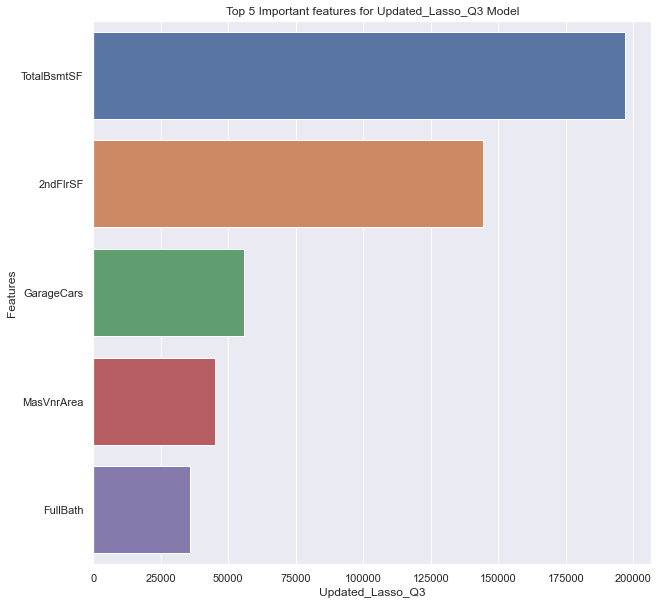

In [251]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Updated_Lasso_Q3', data=betas_new.sort_values(by='Updated_Lasso_Q3', ascending = False).head(5))
plt.title('Top 5 Important features for Updated_Lasso_Q3 Model')
plt.show()

###### Residual Analysis:

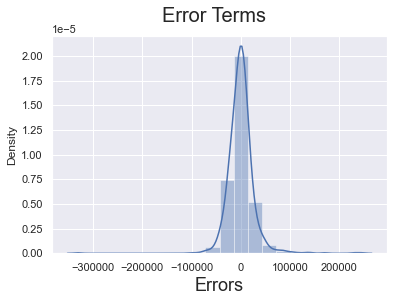

In [252]:
y_train_updated_lasso_2 = updated_lasso_2.predict(X_train_newLasso)
fig = plt.figure()
sns.distplot((y_train - y_train_updated_lasso_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors follow a normal distribution with mean = 0. The assumption is verified here and it holds true.

##### Homoscedasticity Assumption Check :

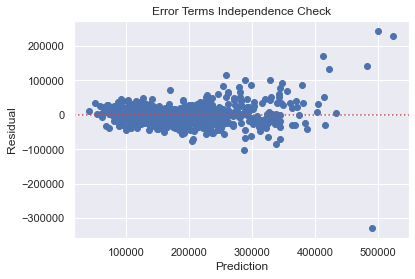

In [253]:
plt.scatter(y_train_updated_lasso_2,(y_train - y_train_updated_lasso_2))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()